### Name: Chinedu Onyeka
### Course: DATA1203 - Business Analysis and Assessments: Assessment 2

#### Data Source: https://health-infobase.canada.ca/covid-19/vaccination-coverage/; "This report was last updated on October 23rd, 2021"

In [1]:
# Import required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
import seaborn as sns
%matplotlib inline

In [2]:
# Load the data from github repo:

url = "https://raw.githubusercontent.com/chinedu2301/DC_Analytics/main/vaccination-coverage-map%20(1).csv"
vax_df = pd.read_csv(url, parse_dates = ['week_end']) # parse_dates converts the week_end column to datetime
vax_df.head(n = 10)

,week_end,pruid,prename,prfname,numtotal_atleast1dose,numtotal_partially,numtotal_fully,proptotal_atleast1dose,proptotal_partially,proptotal_fully,numeligible_atleast1dose,numeligible_partially,numeligible_fully,propeligible_atleast1dose,propeligible_partially,propeligible_fully,numweekdelta_atleast1dose,numweekdelta_fully,propweekdelta_atleast1dose,propweekdelta_fully
0,2020-12-19,1,Canada,Canada,12362,12362.0,0.0,0.07,0.07,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-12-19,10,Newfoundland and Labrador,Terre-Neuve-et-Labrador,972,972.0,0.0,0.19,0.19,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-12-19,12,Nova Scotia,Nouvelle-Écosse,1092,1092.0,0.0,0.11,0.11,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-12-19,24,Quebec,Québec,4728,4728.0,0.0,0.06,0.06,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-12-19,46,Manitoba,Manitoba,894,894.0,0.0,0.06,0.06,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2020-12-19,47,Saskatchewan,Saskatchewan,1042,1042.0,0.0,0.09,0.09,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2020-12-19,59,British Columbia,Colombie-Britannique,3634,3634.0,0.0,0.07,0.07,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2020-12-19,60,Yukon,Yukon,0,0.0,0.0,0.00,0.00,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2020-12-19,61,Northwest Territories,Territoires du Nord-Ouest,0,0.0,0.0,0.00,0.00,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2020-12-19,62,Nunavut,Nunavut,0,0.0,0.0,0.00,0.00,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Clean the data to get only the colums needed for analysis

In [3]:
# Check to see the data type of each variable
vax_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 623 entries, 0 to 622
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   week_end                    623 non-null    datetime64[ns]
 1   pruid                       623 non-null    int64         
 2   prename                     623 non-null    object        
 3   prfname                     623 non-null    object        
 4   numtotal_atleast1dose       623 non-null    int64         
 5   numtotal_partially          614 non-null    float64       
 6   numtotal_fully              609 non-null    float64       
 7   proptotal_atleast1dose      623 non-null    float64       
 8   proptotal_partially         614 non-null    float64       
 9   proptotal_fully             609 non-null    float64       
 10  numeligible_atleast1dose    294 non-null    float64       
 11  numeligible_partially       285 non-null    float64       

In [4]:
# Check the summary statistics
vax_df.describe()

,pruid,numtotal_atleast1dose,numtotal_partially,numtotal_fully,proptotal_atleast1dose,proptotal_partially,proptotal_fully,numeligible_atleast1dose,numeligible_partially,numeligible_fully,propeligible_atleast1dose,propeligible_partially,propeligible_fully,numweekdelta_atleast1dose,numweekdelta_fully,propweekdelta_atleast1dose,propweekdelta_fully
count,623.000000,6.230000e+02,6.140000e+02,6.090000e+02,623.000000,614.000000,609.000000,2.940000e+02,2.850000e+02,2.940000e+02,294.000000,285.000000,294.000000,0.0,0.0,0.0,0.0
mean,34.980738,2.277855e+06,8.444653e+05,1.471423e+06,42.957865,13.636596,29.476486,3.875665e+06,9.520547e+05,2.937608e+06,80.998027,17.074351,62.804388,NaN,NaN,NaN,NaN
std,21.691559,5.439349e+06,2.407593e+06,4.327097e+06,29.837946,14.764665,28.990872,7.108963e+06,2.538345e+06,5.870344e+06,6.470267,17.264061,22.540221,NaN,NaN,NaN,NaN
min,1.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,1.779800e+04,1.399000e+03,1.439700e+04,60.480000,2.830000,3.090000,NaN,NaN,NaN,NaN
25%,12.000000,2.615450e+04,6.004000e+03,1.227800e+04,8.090000,3.512500,1.860000,1.265992e+05,1.489400e+04,4.890700e+04,76.482500,6.440000,54.750000,NaN,NaN,NaN,NaN
50%,46.000000,2.677000e+05,7.667800e+04,5.086300e+04,54.600000,7.285000,16.950000,7.516415e+05,9.550500e+04,5.896070e+05,81.970000,8.760000,71.285000,NaN,NaN,NaN,NaN
75%,59.000000,1.034945e+06,4.368210e+05,6.494910e+05,70.690000,19.250000,59.740000,3.798900e+06,5.642730e+05,2.797600e+06,86.127500,18.950000,78.902500,NaN,NaN,NaN,NaN
max,62.000000,2.961393e+07,1.996076e+07,2.808634e+07,86.010000,60.950000,79.500000,2.950332e+07,1.993665e+07,2.801060e+07,95.710000,68.370000,88.460000,NaN,NaN,NaN,NaN


In [5]:
# filter the required columns
req_col = ['week_end', 'prename', 'numtotal_partially', 'numtotal_fully', 'proptotal_partially',
                'proptotal_fully', 'propeligible_partially', 'propeligible_fully']
vax_sub_df = vax_df[req_col]

# rename the columns
req_col_new_name = {'week_end':'weekend_date', 'prename':'province', 'numtotal_partially':'vax_partially',
                   'numtotal_fully':'vax_fully', 'proptotal_partially':'prop_vax_partially', 
                    'proptotal_fully':'prop_vax_fully', 'propeligible_partially':'prop_eligible_partially',
                   'propeligible_fully':'prop_eligible_fully'}
vax_sub_df = vax_sub_df.rename(columns = req_col_new_name)

# replace na values with 0 for all non-object columns
vax_sub_obj = vax_sub_df.select_dtypes(include = [object])
vax_sub_float = vax_sub_df.select_dtypes(exclude = [object]).fillna(0)

# concatenate both dataframes
vax_sub = pd.concat([vax_sub_obj, vax_sub_float], axis = 1)

# set the weekend_date as index
vax_sub.set_index('weekend_date', inplace = True)

# check the head of the new dataframe
vax_sub.head(n = 10)

,province,vax_partially,vax_fully,prop_vax_partially,prop_vax_fully,prop_eligible_partially,prop_eligible_fully
weekend_date,,,,,,,
2020-12-19,Canada,12362.0,0.0,0.07,0.0,0.0,0.0
2020-12-19,Newfoundland and Labrador,972.0,0.0,0.19,0.0,0.0,0.0
2020-12-19,Nova Scotia,1092.0,0.0,0.11,0.0,0.0,0.0
2020-12-19,Quebec,4728.0,0.0,0.06,0.0,0.0,0.0
2020-12-19,Manitoba,894.0,0.0,0.06,0.0,0.0,0.0
2020-12-19,Saskatchewan,1042.0,0.0,0.09,0.0,0.0,0.0
2020-12-19,British Columbia,3634.0,0.0,0.07,0.0,0.0,0.0
2020-12-19,Yukon,0.0,0.0,0.00,0.0,0.0,0.0
2020-12-19,Northwest Territories,0.0,0.0,0.00,0.0,0.0,0.0


In [6]:
# Recheck the object types
vax_sub.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 623 entries, 2020-12-19 to 2021-10-23
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   province                 623 non-null    object 
 1   vax_partially            623 non-null    float64
 2   vax_fully                623 non-null    float64
 3   prop_vax_partially       623 non-null    float64
 4   prop_vax_fully           623 non-null    float64
 5   prop_eligible_partially  623 non-null    float64
 6   prop_eligible_fully      623 non-null    float64
dtypes: float64(6), object(1)
memory usage: 38.9+ KB


In [7]:
# Check for any na values
vax_sub.isnull().sum()

province                   0
vax_partially              0
vax_fully                  0
prop_vax_partially         0
prop_vax_fully             0
prop_eligible_partially    0
prop_eligible_fully        0
dtype: int64

In [8]:
# Subset the dataframe to get information on the current covid vaccinations in Canada as of October 23rd
vax_current_oct23 = vax_sub.tail(n = 14)
vax_current_oct23

,province,vax_partially,vax_fully,prop_vax_partially,prop_vax_fully,prop_eligible_partially,prop_eligible_fully
weekend_date,,,,,,,
2021-10-23,Canada,1527593.0,28086337.0,3.99,73.44,4.46,83.66
2021-10-23,Newfoundland and Labrador,33904.0,413833.0,6.51,79.50,7.24,88.46
2021-10-23,Prince Edward Island,8291.0,127073.0,5.05,77.33,5.70,87.38
2021-10-23,Nova Scotia,49939.0,755688.0,5.03,76.17,5.65,85.45
2021-10-23,New Brunswick,53947.0,582195.0,6.84,73.77,7.61,82.78
2021-10-23,Quebec,213715.0,6542681.0,2.48,76.04,2.83,86.86
2021-10-23,Ontario,521433.0,10932976.0,3.52,73.74,3.96,83.62
2021-10-23,Manitoba,44874.0,997948.0,3.24,72.12,3.81,84.85
2021-10-23,Saskatchewan,76328.0,773812.0,6.47,65.59,7.57,77.48


#### Visualizations

In [9]:
# rest the index 
vax_current = vax_current_oct23.reset_index()
vax_sub1 = vax_current_oct23[1:].reset_index()
vax_sub = vax_sub.reset_index()
# sort by fully vaccinated
vax_sub1.sort_values('prop_vax_fully', inplace = True, ascending=False)
vax_sub1

,weekend_date,province,vax_partially,vax_fully,prop_vax_partially,prop_vax_fully,prop_eligible_partially,prop_eligible_fully
0,2021-10-23,Newfoundland and Labrador,33904.0,413833.0,6.51,79.50,7.24,88.46
1,2021-10-23,Prince Edward Island,8291.0,127073.0,5.05,77.33,5.70,87.38
2,2021-10-23,Nova Scotia,49939.0,755688.0,5.03,76.17,5.65,85.45
4,2021-10-23,Quebec,213715.0,6542681.0,2.48,76.04,2.83,86.86
9,2021-10-23,British Columbia,235625.0,3898974.0,4.52,74.77,5.06,83.84
3,2021-10-23,New Brunswick,53947.0,582195.0,6.84,73.77,7.61,82.78
5,2021-10-23,Ontario,521433.0,10932976.0,3.52,73.74,3.96,83.62
10,2021-10-23,Yukon,1436.0,31191.0,3.34,72.63,3.84,83.37
6,2021-10-23,Manitoba,44874.0,997948.0,3.24,72.12,3.81,84.85
11,2021-10-23,Northwest Territories,1836.0,29198.0,4.22,67.16,5.02,79.61


Text(0, 0.5, 'Percent vaccinated')

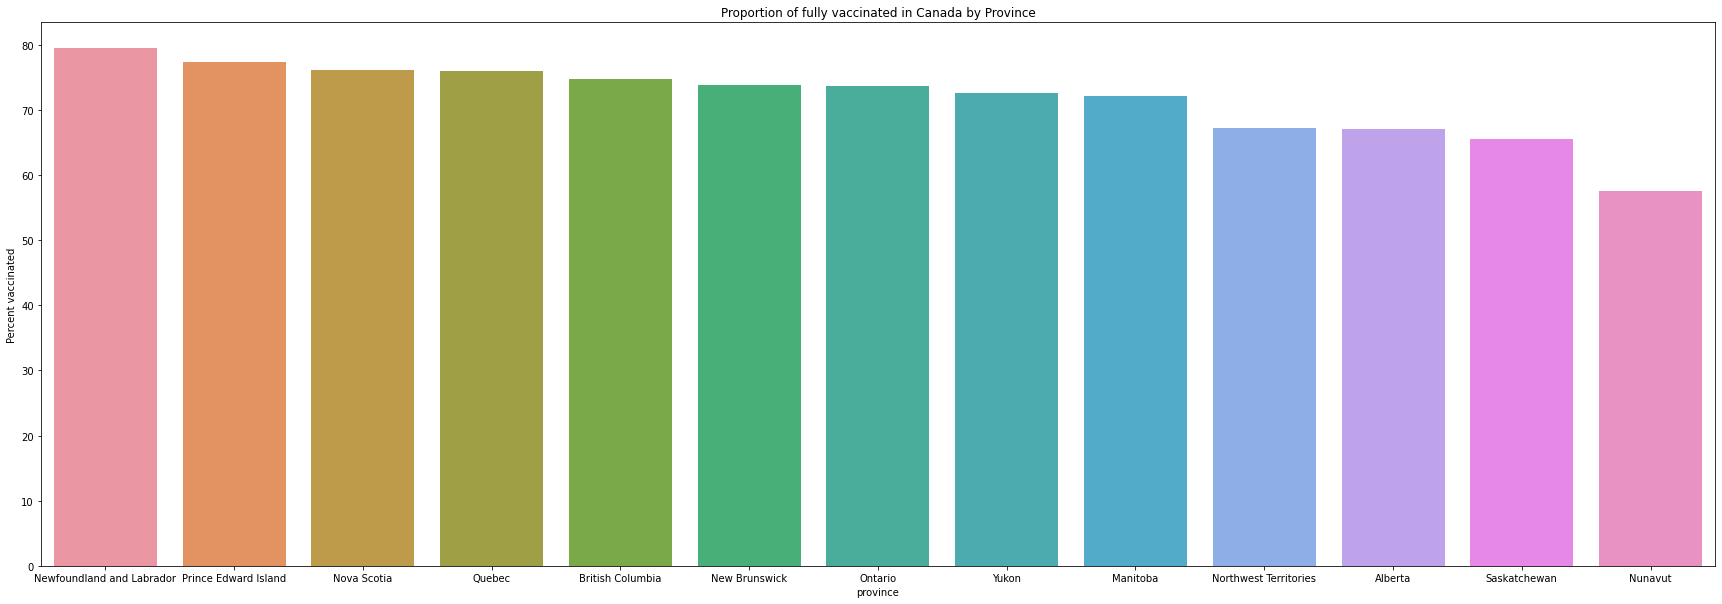

In [10]:
# Bar plot of full vaccination in Canada by province
plt.figure(figsize = (30, 10))
sns.barplot(x = 'province', y = 'prop_vax_fully', data = vax_sub1)
plt.title("Proportion of fully vaccinated in Canada by Province")
plt.ylabel("Percent vaccinated")

Text(0.5, 0, '')

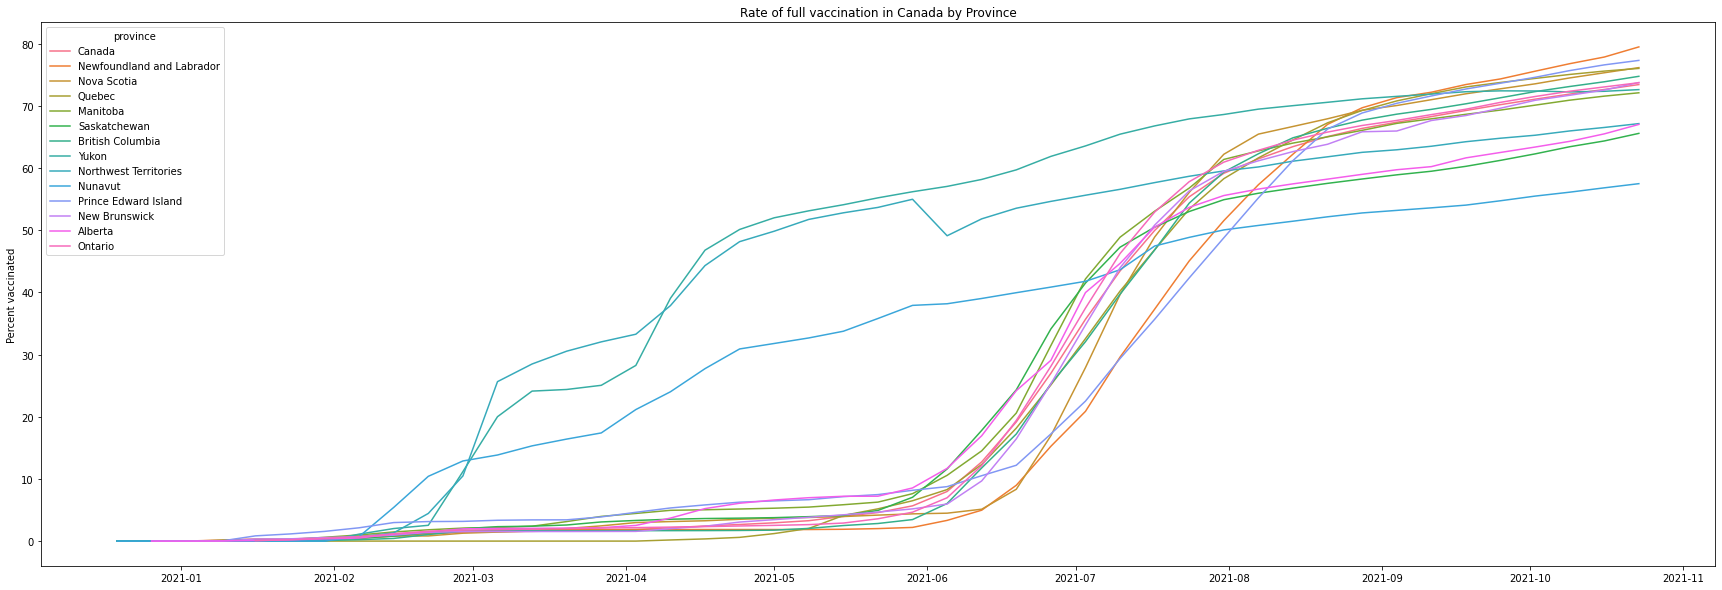

In [11]:
# Line plot of full vaccination in Canada
plt.figure(figsize = (30, 10))
sns.lineplot(x = 'weekend_date', y = 'prop_vax_fully', hue ='province' , data = vax_sub)
plt.title("Rate of full vaccination in Canada by Province")
plt.ylabel("Percent vaccinated")
plt.xlabel("")

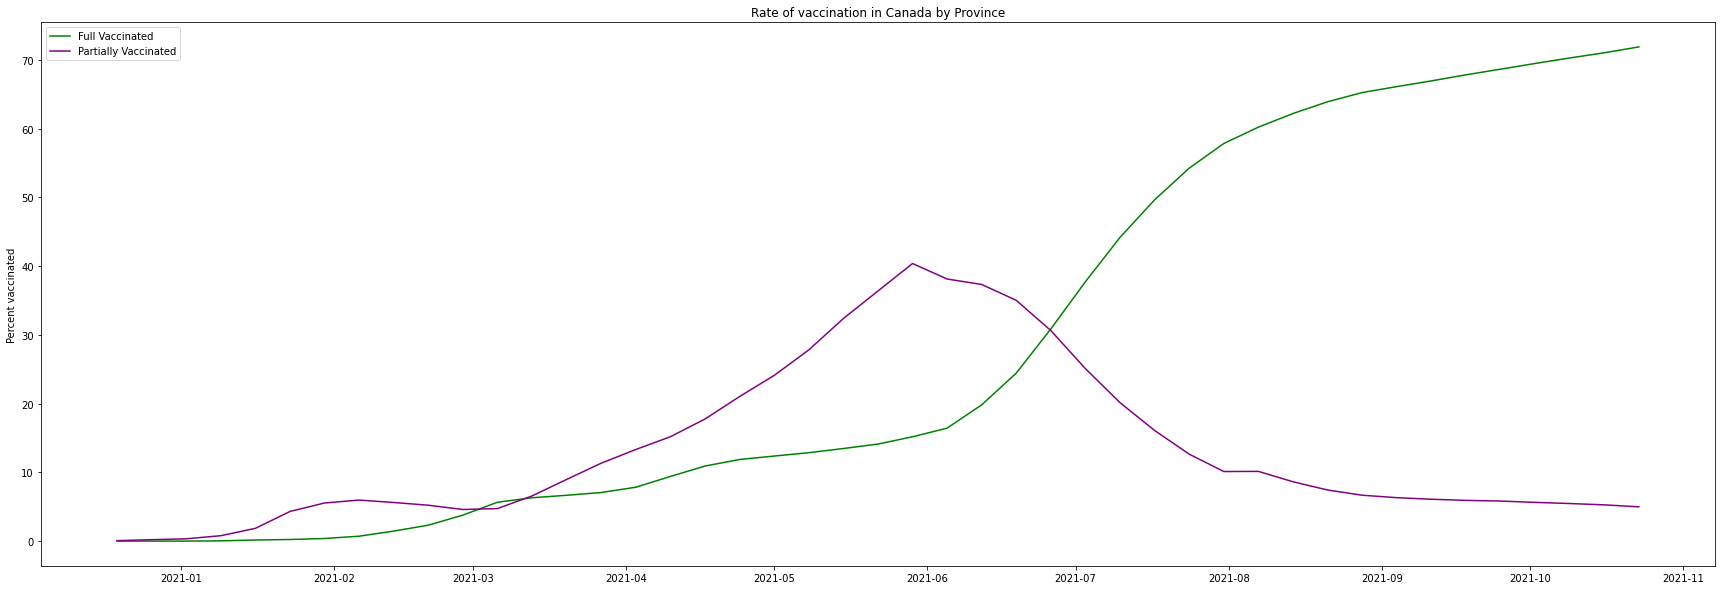

In [12]:
plt.figure(figsize = (30, 10))
sns.lineplot(x = 'weekend_date', y = 'prop_vax_fully', ci = None, color = "green", label = "Full Vaccinated", data = vax_sub)
sns.lineplot(x = 'weekend_date', y = 'prop_vax_partially', ci = None, color = "purple", label = "Partially Vaccinated", data = vax_sub)
plt.title("Rate of vaccination in Canada by Province")
plt.ylabel("Percent vaccinated")
plt.xlabel("")
plt.legend()

In [13]:
# write the dataframes to csv
vax_sub1.to_csv('vax_sub1.csv', index = False)
vax_sub.to_csv('vax2_sub.csv', index = False)
vax_current.to_csv('vax_current.csv', index = False)